In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_df = pd.read_csv("../data/raw/fear_greed_index.csv")
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])


In [2]:
sentiment_df = sentiment_df.sort_values("date").reset_index(drop=True)
sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [3]:
sentiment_df["classification"].value_counts()


classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

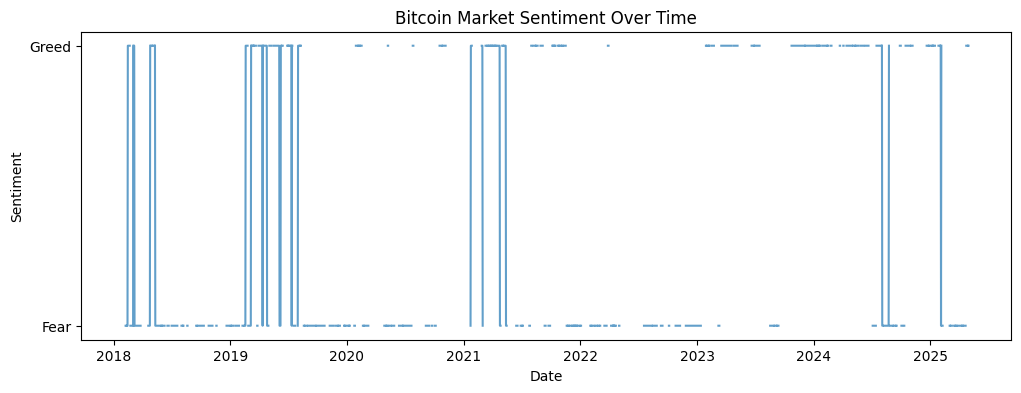

In [4]:
plt.figure(figsize=(12,4))
plt.plot(sentiment_df["date"], 
         sentiment_df["classification"].map({"Fear": 0, "Greed": 1}),
         alpha=0.7)

plt.yticks([0, 1], ["Fear", "Greed"])
plt.title("Bitcoin Market Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.show()


In [5]:
sentiment_df["sentiment_change"] = (
    sentiment_df["classification"] != sentiment_df["classification"].shift()
)

sentiment_df["streak_id"] = sentiment_df["sentiment_change"].cumsum()

streak_lengths = sentiment_df.groupby("streak_id").size()

streak_lengths.describe()


count    595.000000
mean       4.443697
std        7.223333
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       77.000000
dtype: float64

In [7]:
sentiment_df["sentiment_change"] = (
    sentiment_df["classification"] != sentiment_df["classification"].shift()
)


In [8]:
sentiment_df["streak_id"] = sentiment_df["sentiment_change"].cumsum()


In [9]:
streak_df = (
    sentiment_df
    .groupby(["streak_id", "classification"])
    .size()
    .reset_index(name="streak_length")
)

streak_df.head()


,streak_id,classification,streak_length
0,1,Fear,1
1,2,Extreme Fear,1
2,3,Fear,1
3,4,Extreme Fear,3
4,5,Fear,3


In [10]:
streak_df.groupby("classification")["streak_length"].mean()


classification
Extreme Fear     5.521739
Extreme Greed    5.927273
Fear             4.567251
Greed            4.688889
Neutral          2.788732
Name: streak_length, dtype: float64

In [11]:
streak_df.groupby("classification")["streak_length"].describe()


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,92.0,5.521739,10.109813,1.0,1.0,2.0,5.25,74.0
Extreme Greed,55.0,5.927273,11.769160,1.0,1.0,2.0,5.50,77.0
Fear,171.0,4.567251,6.172032,1.0,1.0,2.0,5.50,48.0
Greed,135.0,4.688889,6.181903,1.0,1.0,3.0,6.00,42.0
Neutral,142.0,2.788732,3.754583,1.0,1.0,1.0,3.00,28.0
